To analyze the relationship between the rotation angles (roll, pitch, yaw) of the sensors, you can use multivariate regression. Here's a step-by-step guide on how to proceed:

# 1. Load the Data:
- Read the CSV file into a DataFrame.
- Check the structure and content of the DataFrame.

# 2. Exploratory Data Analysis (EDA):
- Plot the data to visualize any obvious relationships.
= Check for correlations between the rotation angles.

# 3. Preprocessing:
- Handle any missing or inconsistent data.
- Normalize or standardize the data if necessary.

# 4. Multivariate Regression:
- Define the independent and dependent variables.
- Fit a multivariate regression model.

# 5. Evaluate the model's performance.

# 1. Exploratory Data Analysis (EDA):
- Visualize the data with pair plots to observe any relationships.
- Check correlations between the angles.

In [1]:
import pandas as pd

# Load the CSV file
file_path = 'D:\Learning\Biomechanic\multi_mpu_app_final\patient2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

,Timestamp,shoulder joint X,shoulder joint Y,shoulder joint Z,elbow joint X,elbow joint Y,elbow joint Z,wrist joint X,wrist joint Y,wrist joint Z
0,6.028346,-2.31,-5.12,-189.14,5.37,-3.51,-9.68,4.54,-5.53,-45.81
1,6.034392,-2.36,-5.28,-189.21,5.41,-3.49,-9.73,4.56,-5.51,-45.87
2,6.054513,-2.40,-5.45,-189.26,5.43,-3.47,-9.80,4.57,-5.47,-45.93
3,6.056516,-2.50,-5.88,-189.24,5.31,-3.31,-10.05,4.48,-5.26,-46.22
4,6.069822,-2.53,-5.97,-189.17,5.22,-3.22,-10.17,4.43,-5.16,-46.37


In [3]:
# Check for missing values
print(data.isnull().sum())

Timestamp           0
shoulder joint X    0
shoulder joint Y    0
shoulder joint Z    0
elbow joint X       0
elbow joint Y       0
elbow joint Z       0
wrist joint X       0
wrist joint Y       0
wrist joint Z       0
dtype: int64


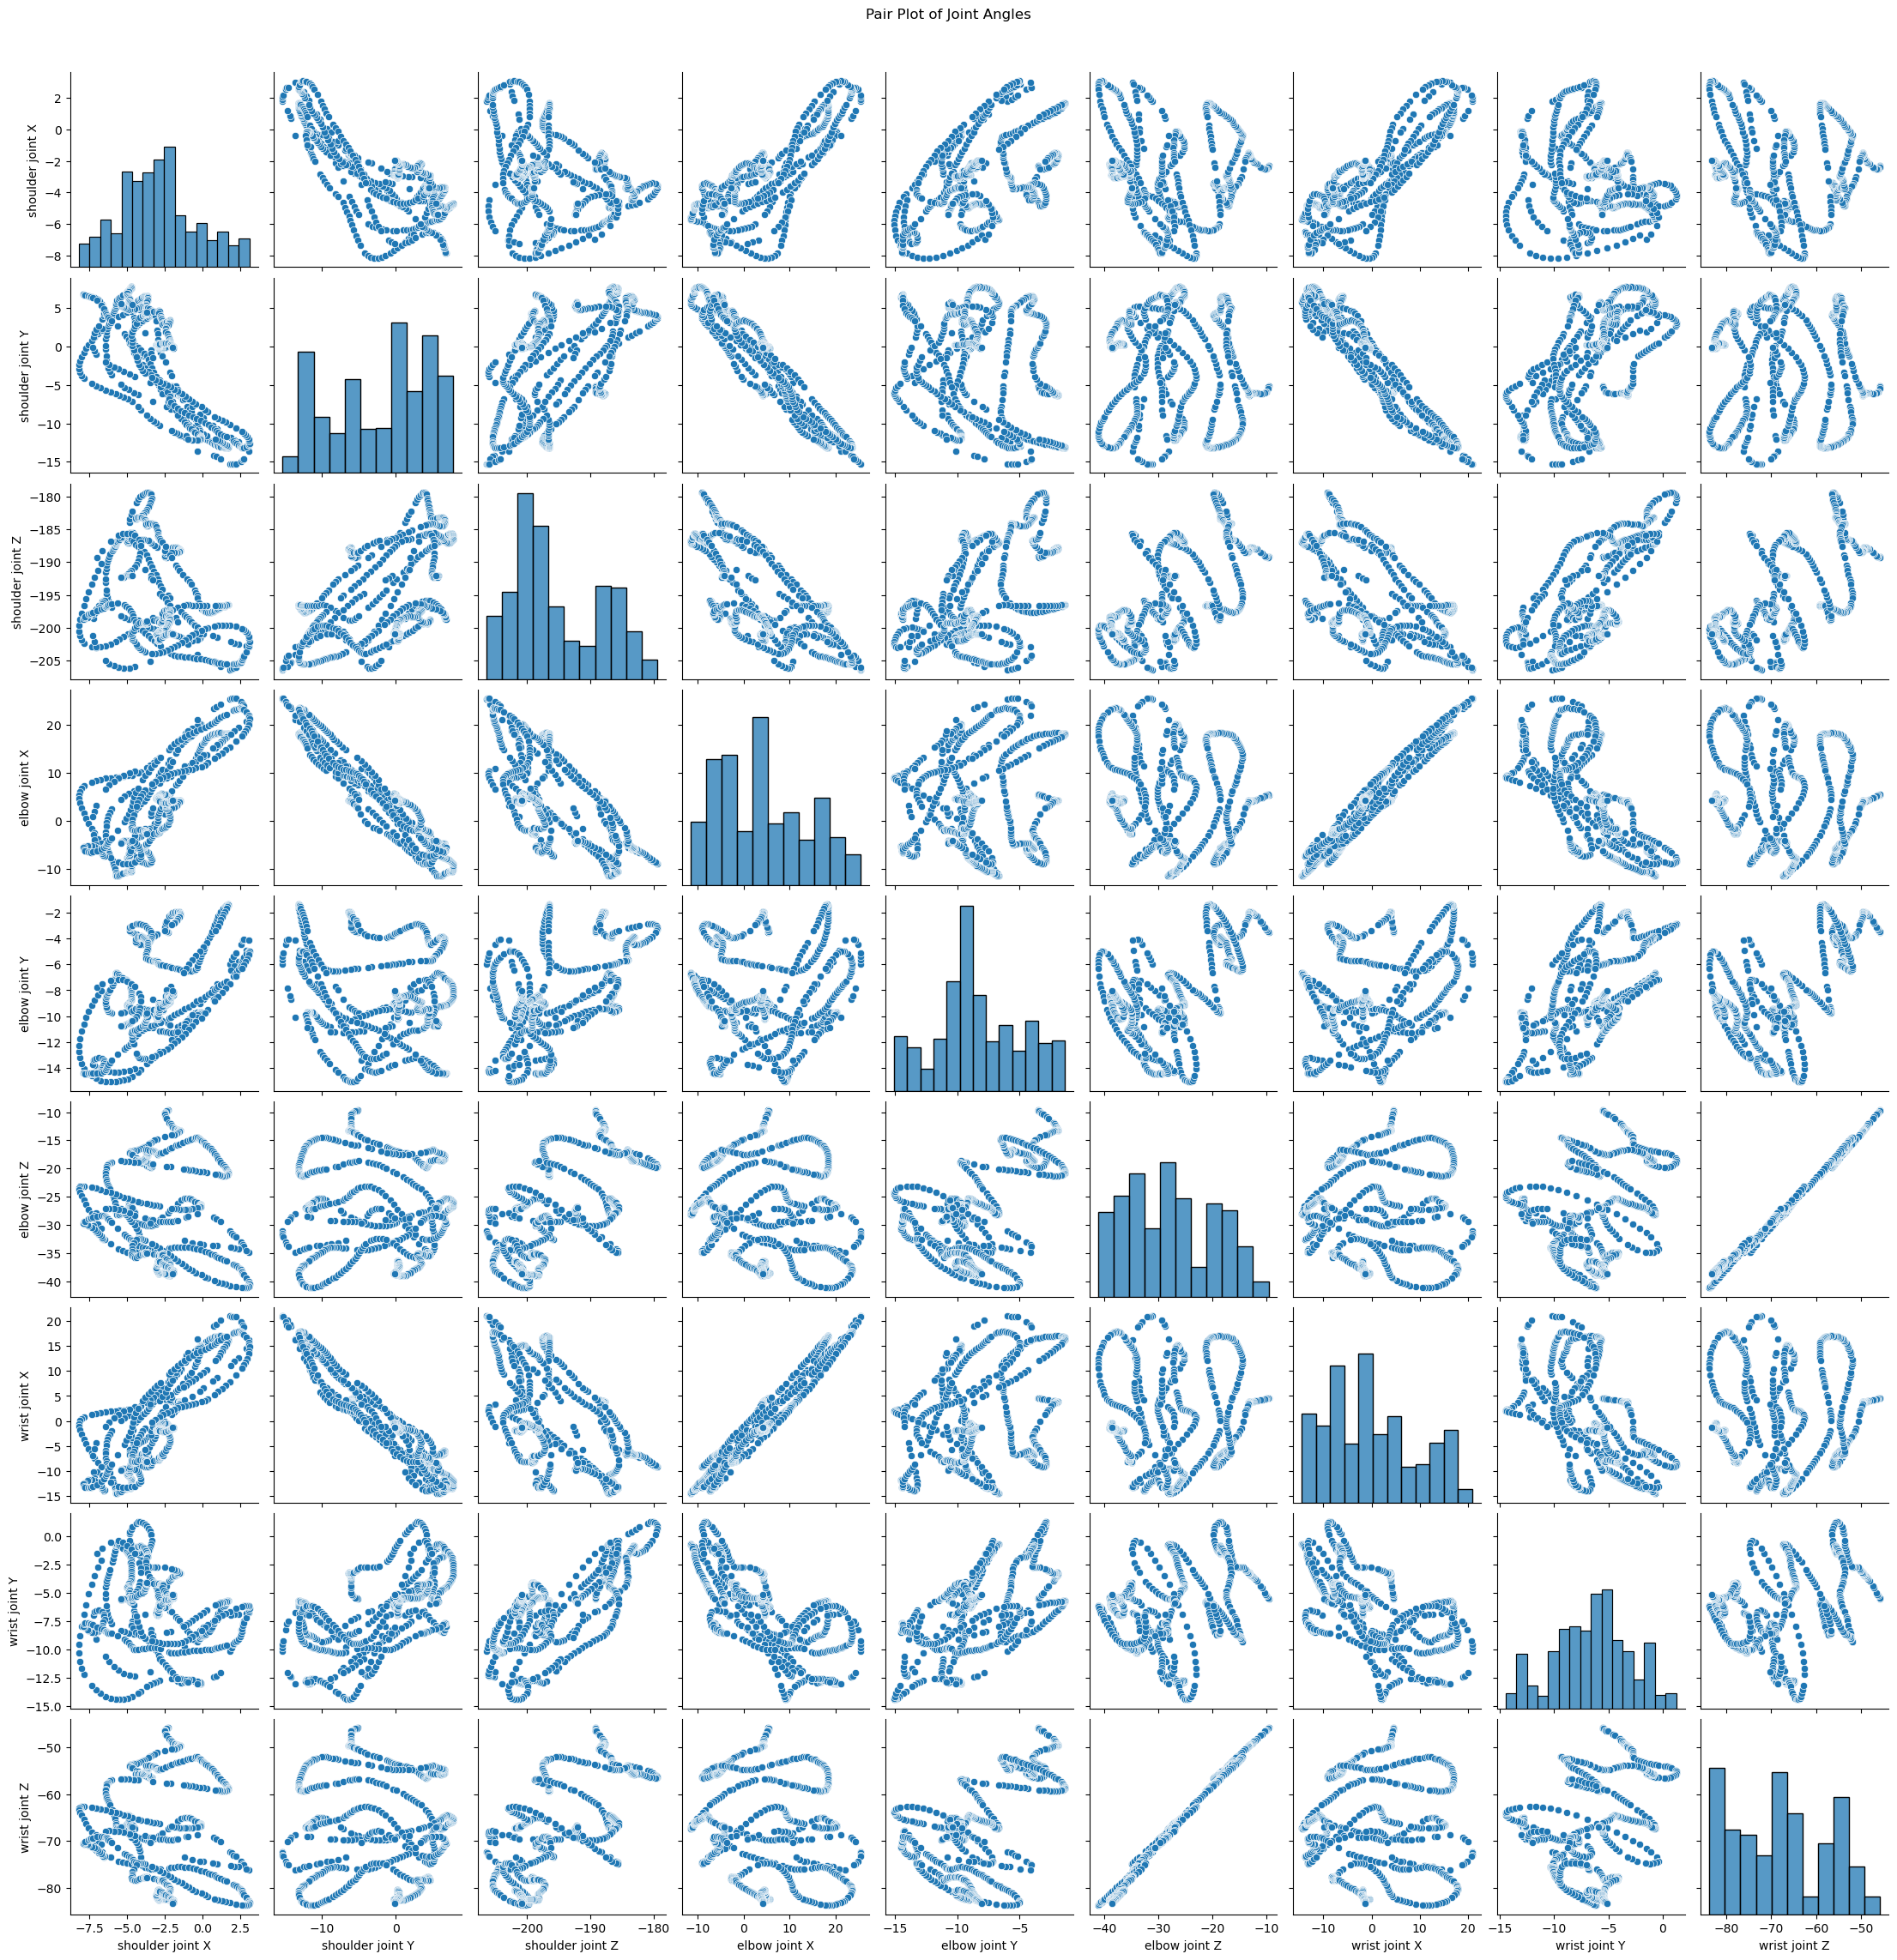

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize relationships
sns.pairplot(data.drop(columns=['Timestamp']))
plt.suptitle("Pair Plot of Joint Angles", y=1.02)
plt.show()

In [5]:
# Correlation matrix
correlation_matrix = data.drop(columns=['Timestamp']).corr()

# Display the correlation matrix
correlation_matrix

,shoulder joint X,shoulder joint Y,shoulder joint Z,elbow joint X,elbow joint Y,elbow joint Z,wrist joint X,wrist joint Y,wrist joint Z
shoulder joint X,1.000000,-0.775545,-0.356105,0.805532,0.502440,-0.103799,0.843949,-0.220194,-0.105212
shoulder joint Y,-0.775545,1.000000,0.533869,-0.951655,-0.230167,-0.072178,-0.959310,0.598800,-0.067259
shoulder joint Z,-0.356105,0.533869,1.000000,-0.682511,0.491027,0.620702,-0.513204,0.725686,0.647093
elbow joint X,0.805532,-0.951655,-0.682511,1.000000,0.098280,-0.139147,0.972704,-0.689788,-0.148788
elbow joint Y,0.502440,-0.230167,0.491027,0.098280,1.000000,0.528084,0.288521,0.578752,0.534877
elbow joint Z,-0.103799,-0.072178,0.620702,-0.139147,0.528084,1.000000,0.047599,0.232574,0.997647
wrist joint X,0.843949,-0.959310,-0.513204,0.972704,0.288521,0.047599,1.000000,-0.581666,0.039492
wrist joint Y,-0.220194,0.598800,0.725686,-0.689788,0.578752,0.232574,-0.581666,1.000000,0.244887
wrist joint Z,-0.105212,-0.067259,0.647093,-0.148788,0.534877,0.997647,0.039492,0.244887,1.000000


# 2. Define Independent and Dependent Variables:
- Independent variables: shoulder joint angles (shoulder joint X, shoulder joint Y, shoulder joint Z).
- Dependent variables: elbow and wrist joint angles (elbow joint X, elbow joint Y, elbow joint Z, wrist joint X, wrist joint Y, wrist joint Z).
# 3. Fit the Model:
- Use a multivariate regression approach to predict the dependent variables based on the independent variables.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables (shoulder joint angles)
X = data[['shoulder joint X', 'shoulder joint Y', 'shoulder joint Z']]

# Define dependent variables (elbow and wrist joint angles)
Y = data[['elbow joint X', 'elbow joint Y', 'elbow joint Z', 'wrist joint X', 'wrist joint Y', 'wrist joint Z']]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and fit the multivariate regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the dependent variables using the test set
Y_pred = model.predict(X_test)

# 4. Evaluate the Model:
Assess the performance using appropriate metrics such as R-squared and RMSE (Root Mean Square Error).

In [7]:
# Evaluate the model
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

rmse, r2

(2.7109471517855863, 0.8210939649386614)

# Plot Predicted vs. Actual Values
Create scatter plots for each dependent variable (elbow and wrist joint angles) showing the predicted values versus the actual values.

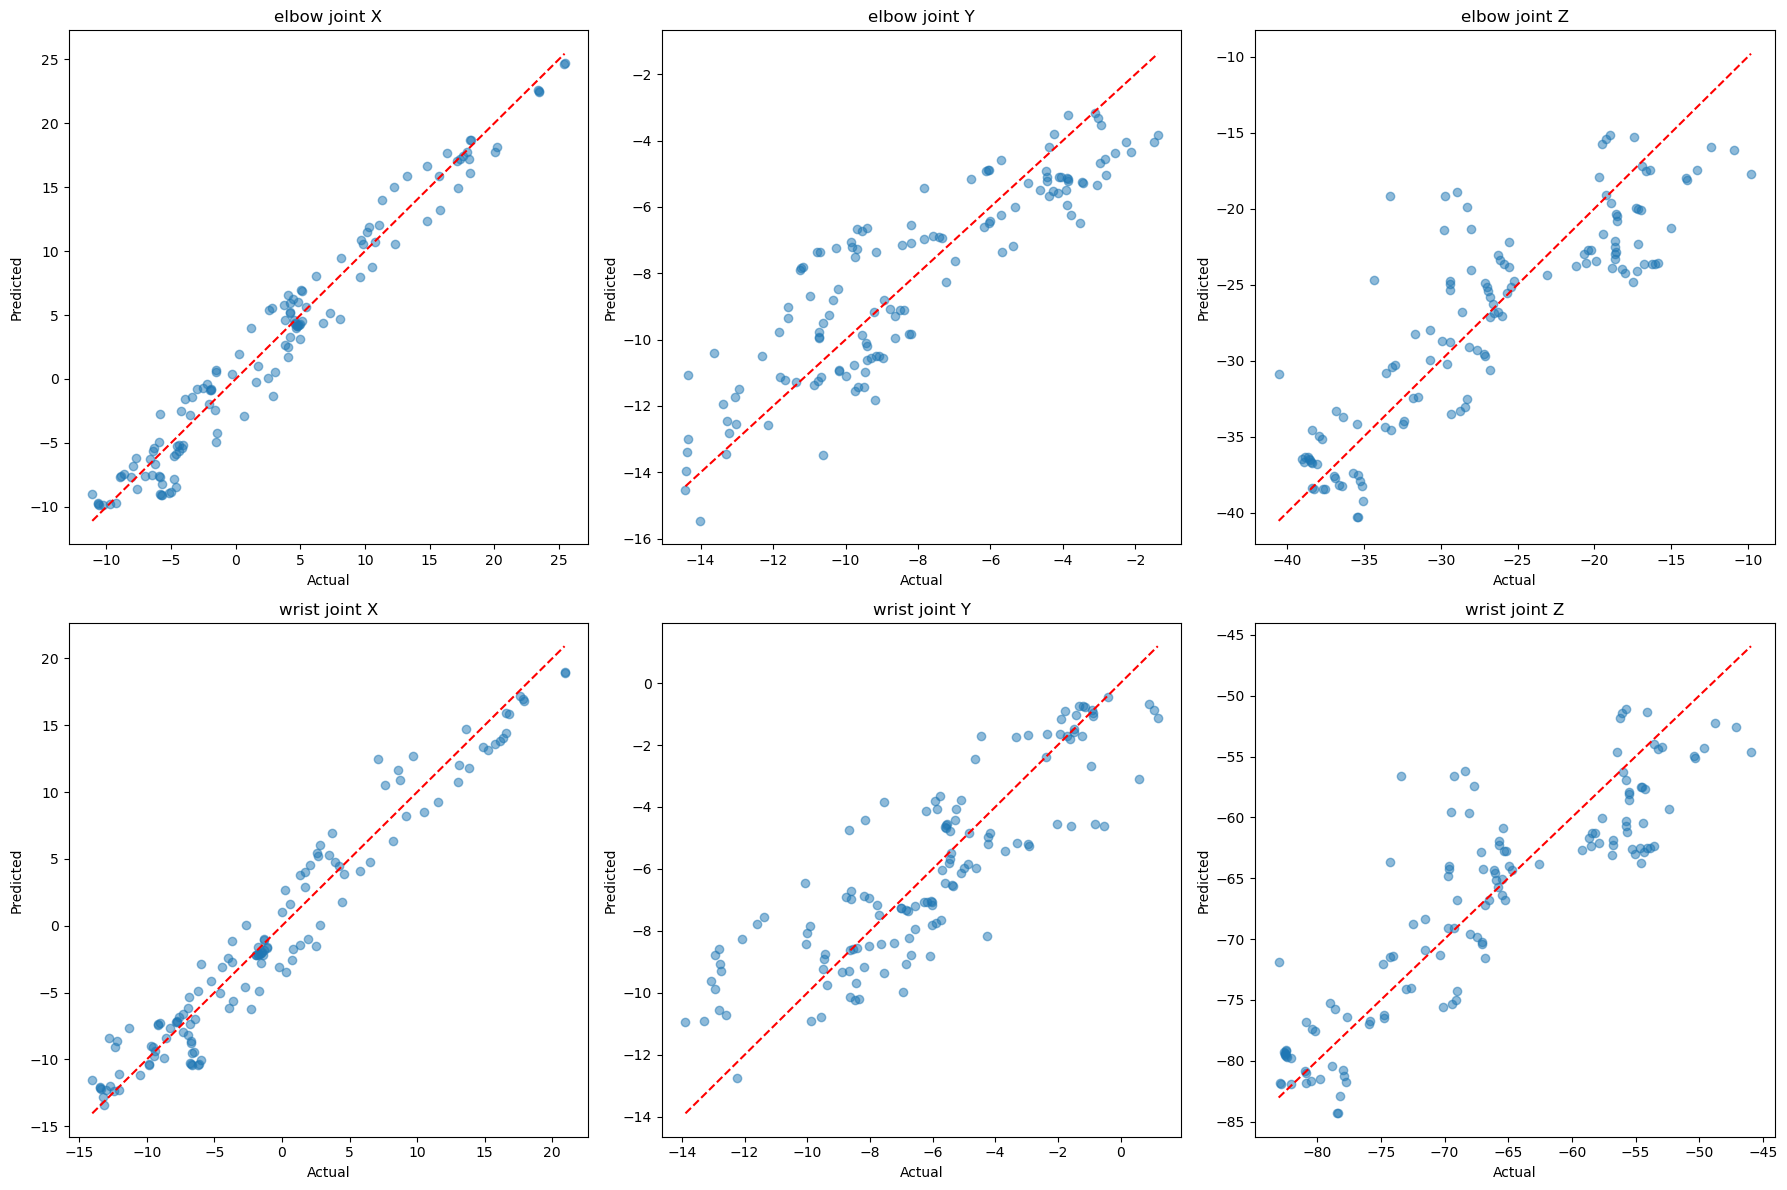

In [9]:
import matplotlib.pyplot as plt

# Predicted vs. Actual plots for each dependent variable
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Titles for each subplot
titles = ['elbow joint X', 'elbow joint Y', 'elbow joint Z', 'wrist joint X', 'wrist joint Y', 'wrist joint Z']

# Plot the predicted vs. actual values
for i, ax in enumerate(axs.flat):
    ax.scatter(Y_test.iloc[:, i], Y_pred[:, i], alpha=0.5)
    ax.plot([Y_test.iloc[:, i].min(), Y_test.iloc[:, i].max()],
            [Y_test.iloc[:, i].min(), Y_test.iloc[:, i].max()], 'r--')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

# Examine the Coefficients: 
Understand the influence of each shoulder joint angle on the elbow and wrist joint angles.

In [8]:
# Retrieve the coefficients of the regression model
coefficients = pd.DataFrame(model.coef_, columns=['shoulder joint X', 'shoulder joint Y', 'shoulder joint Z'], index=['elbow joint X', 'elbow joint Y', 'elbow joint Z', 'wrist joint X', 'wrist joint Y', 'wrist joint Z'])

# Add intercepts
coefficients['Intercept'] = model.intercept_

coefficients

,shoulder joint X,shoulder joint Y,shoulder joint Z,Intercept
elbow joint X,0.753420,-0.952382,-0.372473,-68.235576
elbow joint Y,0.920258,-0.064481,0.393800,71.144098
elbow joint Z,-1.789903,-1.256837,1.132387,185.448087
wrist joint X,0.887040,-1.062674,-0.042344,-7.815437
wrist joint Y,0.735125,0.383987,0.262554,47.734113
wrist joint Z,-2.290617,-1.633119,1.501901,215.207528


# Plot Residuals 
Plot the residuals (difference between actual and predicted values) to check for any patterns.

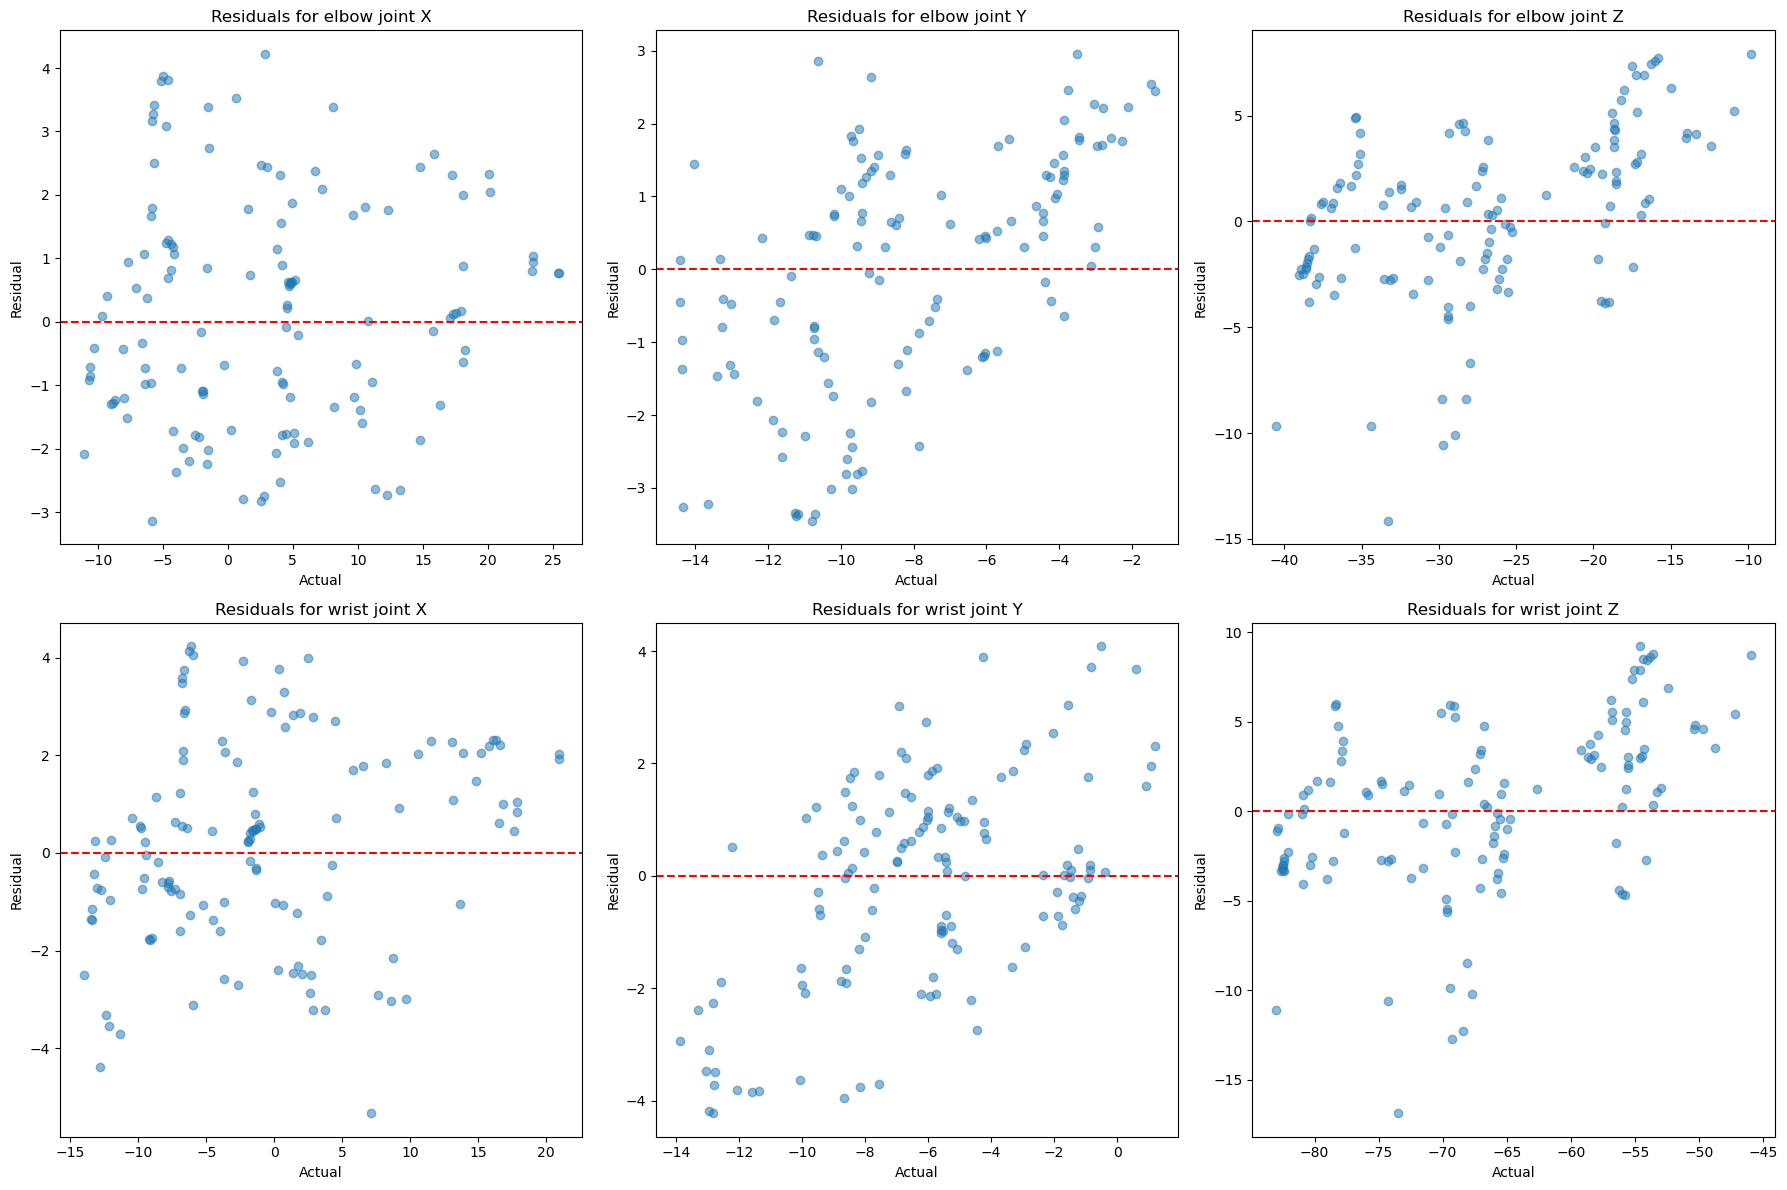

In [11]:
# Residual plots for each dependent variable
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot the residuals
for i, ax in enumerate(axs.flat):
    residuals = Y_test.iloc[:, i] - Y_pred[:, i]
    ax.scatter(Y_test.iloc[:, i], residuals, alpha=0.5)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Residual')
    ax.set_title(f'Residuals for {titles[i]}')

plt.tight_layout()
plt.show()

# Cross-Validation
Perform cross-validation to ensure the model's robustness.

In [12]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Initialize the regression model
model = LinearRegression()

# Define k for k-fold cross-validation
k = 5

# Initialize k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation for RMSE
rmse_scores = -cross_val_score(model, X, Y, scoring='neg_root_mean_squared_error', cv=kf)

# Perform cross-validation for R²
r2_scores = cross_val_score(model, X, Y, scoring='r2', cv=kf)

# Calculate mean and standard deviation of RMSE and R²
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard Deviation of RMSE: {std_rmse:.2f}")
print(f"Mean R²: {mean_r2:.2f}")
print(f"Standard Deviation of R²: {std_r2:.2f}")

Mean RMSE: 2.78
Standard Deviation of RMSE: 0.14
Mean R²: 0.81
Standard Deviation of R²: 0.02
